## Exploracion: Ingesta y Visualizacion de Datos

In [25]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
import seaborn as sns #for pair plots
# Use datetime for dealing with dates
import datetime
%matplotlib inline
plt.style.use('fivethirtyeight')



In [26]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as a dataframe
features = pd.read_csv('/home/benjamin/benstuff/temps_extended.csv')
features.head(5)

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [27]:
print('We have {} days of data with {} variables.'.format(*features.shape))


We have 2191 days of data with 12 variables.


In [28]:

features.describe()


,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,2013.501597,6.523505,15.713829,7.371734,0.116276,0.010041,61.173893,61.177545,60.285897,61.177545,60.313555
std,1.709461,3.449872,8.801867,3.154971,0.251575,0.153764,13.085681,13.082281,10.732582,13.081339,15.871568
min,2011.000000,1.000000,1.000000,0.890000,0.000000,0.000000,29.000000,29.000000,45.100000,29.000000,25.000000
25%,2012.000000,4.000000,8.000000,5.140000,0.000000,0.000000,51.000000,51.000000,50.100000,51.000000,49.000000
50%,2014.000000,7.000000,16.000000,6.710000,0.000000,0.000000,60.000000,60.000000,58.800000,60.000000,60.000000
75%,2015.000000,10.000000,23.000000,9.170000,0.120000,0.000000,71.000000,71.000000,70.200000,71.000000,71.000000
max,2017.000000,12.000000,31.000000,21.250000,2.200000,3.000000,96.000000,96.000000,77.400000,96.000000,97.000000


In [29]:

# generate unique colum for date in the required format
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
#zip converts to tupels like (2016, 12, 26) then 2016-12-26 then datetime objects
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Detect which seasons we have
seasons = []

for month in features['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')

# Will only use four variables for plotting pairs
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
reduced_features['season'] = seasons
reduced_features.head(5)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,temp_1,prcp_1,average,actual,season
0,37,0.00,45.6,40,winter
1,40,0.00,45.7,39,winter
2,39,0.00,45.8,42,winter
3,42,0.00,45.9,38,winter
4,38,0.03,46.0,45,winter


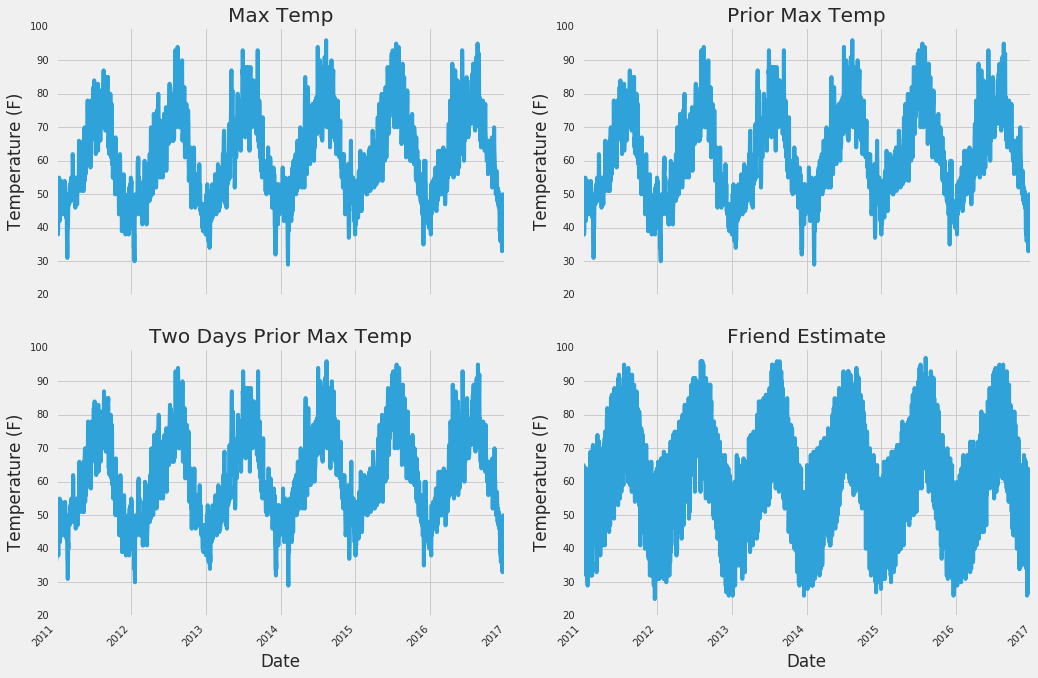

In [30]:
# Layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')
"""
From docs: tight_layout automatically adjusts subplot params so that the s
ubplot(s) fits in to the figure area. May or may not work (from docs) 
https://matplotlib.org/users/tight_layout_guide.html
"""
plt.tight_layout(pad=2)

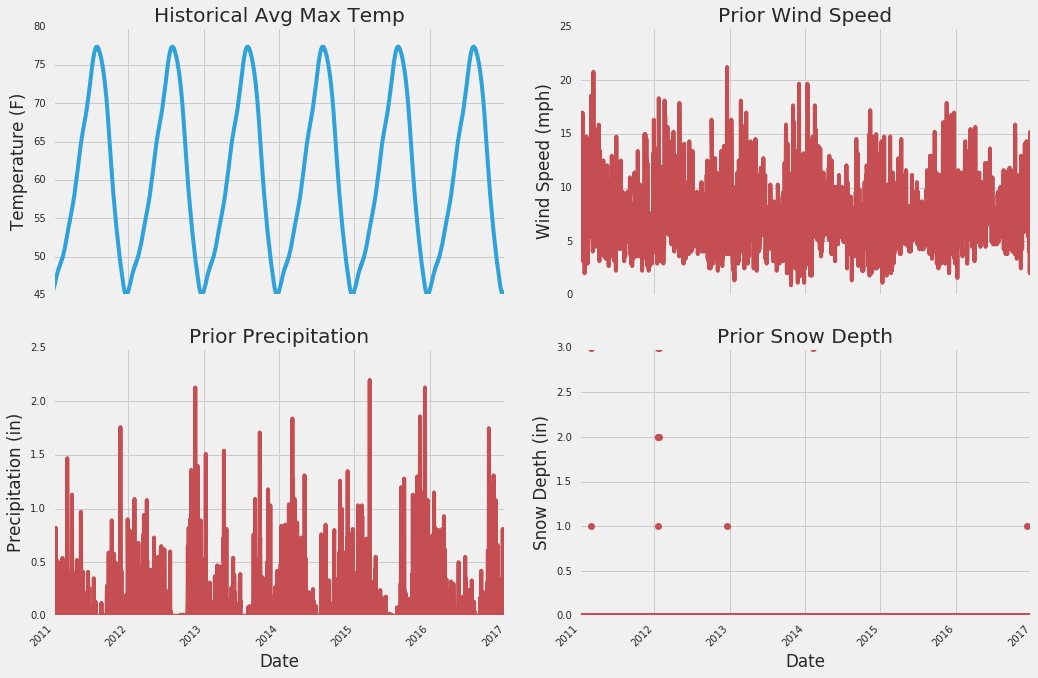

In [31]:
# Layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Historical Average Max Temp
ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Avg Max Temp')

# Prior Avg Wind Speed 
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mph)'); ax2.set_title('Prior Wind Speed')

# Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

# Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')
plt.tight_layout(pad=2)

## Pair plots to Explore Correlation


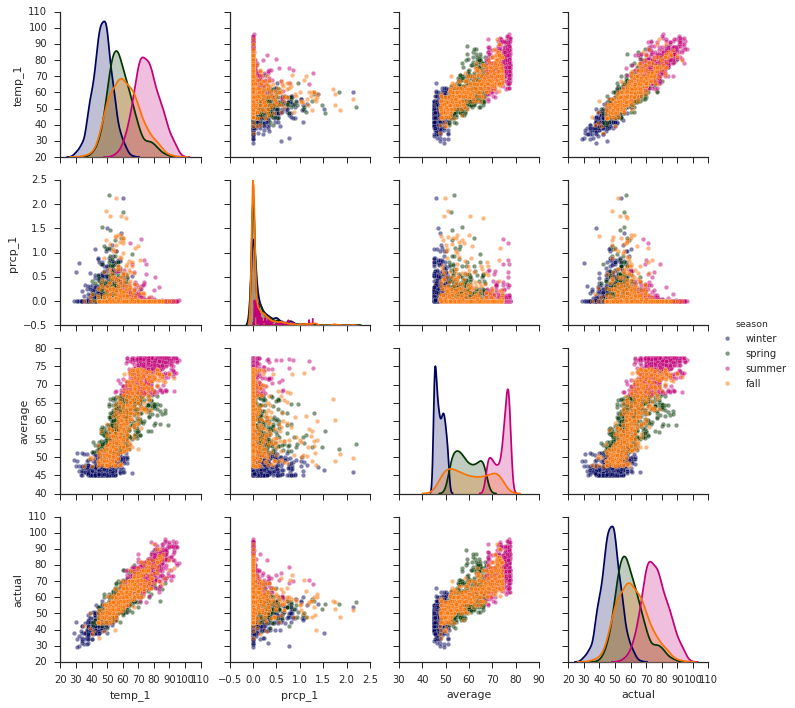

In [32]:
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'magenta', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.5),
                   diag_kws=dict(shade=True));

/usr/local/lib/python2.7/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python2.7/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


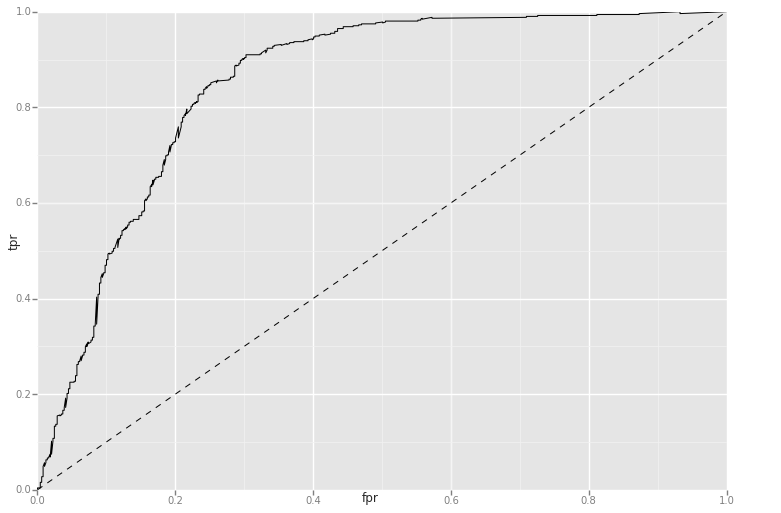

<ggplot: (8779808598313)>


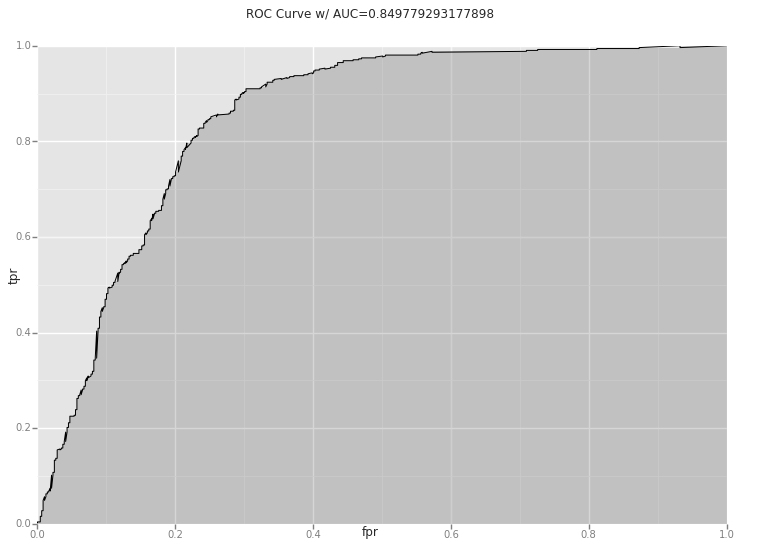

<ggplot: (8779812584141)>


In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
from ggplot import *
#i had to sudo pip install statsmodels --upgrade

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
Xtrain = X[:9000]
Xtest = X[9000:]
ytrain = y[:9000]
ytest = y[9000:]

classificator= LogisticRegression()
classificator.fit(Xtrain, ytrain)

#Plot a Reciver Operational Curve (ROC) to evaluate the performance
#of the classificator 
predictions = classificator.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds= metrics.roc_curve(ytest, predictions)

#dataframe for the ROC curve
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
df.head(5)
#ggplot with code that resembles R
rocg=ggplot(df, aes(x='fpr', y='tpr')) +geom_line() +geom_abline(linetype='dashed')
print(rocg)

#AUC
auc = metrics.auc(fpr,tpr)
aucg=ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_area(alpha=0.2) +geom_line(aes(y='tpr')) +ggtitle("ROC Curve w/ AUC=%s" % str(auc))
print(aucg)

